# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'/Users/Evan/Desktop/MLB Team Stats Project'

In [5]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'mlb_teams_clean.pkl'))

# Step 3.

In [6]:
sub = df[['earned_run_average', 'wins']]

In [8]:
sub.isnull().sum()

earned_run_average    0
wins                  0
dtype: int64

Earned run average and wins data confirmed to contain no null values

# Step 4. 

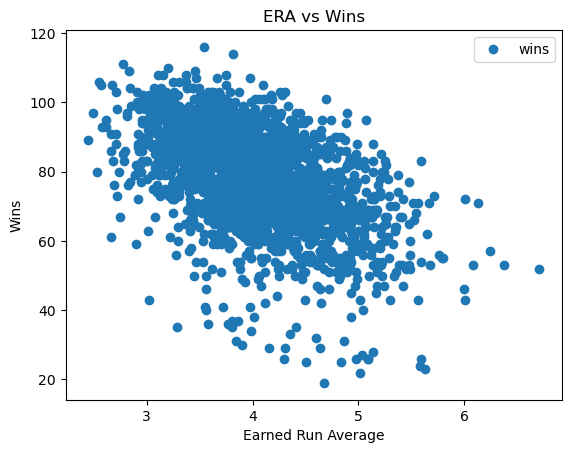

In [9]:
# scatterplot to visualize earned run average vs wins

df.plot(x = 'earned_run_average', y='wins',style='o') 
plt.title('ERA vs Wins')  
plt.xlabel('Earned Run Average')  
plt.ylabel('Wins')  
plt.show()

# Step 5. 

As earned run average increases, wins will decrease

# Step 6. 

In [11]:
# reshaping variables into numpy array for analysis
X = df['earned_run_average'].values.reshape(-1,1)
y = df['wins'].values.reshape(-1,1)

In [12]:
# array check
X

array([[3.82],
       [2.62],
       [3.54],
       ...,
       [5.02],
       [4.6 ],
       [5.09]])

In [13]:
# array check
y

array([[72],
       [93],
       [62],
       ...,
       [22],
       [32],
       [26]])

# Step 7. 

In [14]:
# creating test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 8. 

In [15]:
# Creating regression object
regression = LinearRegression()

In [16]:
# fitting regression to training set
regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# setting prediction for y values using X
y_predicted = regression.predict(X_test)

# Step 9. 

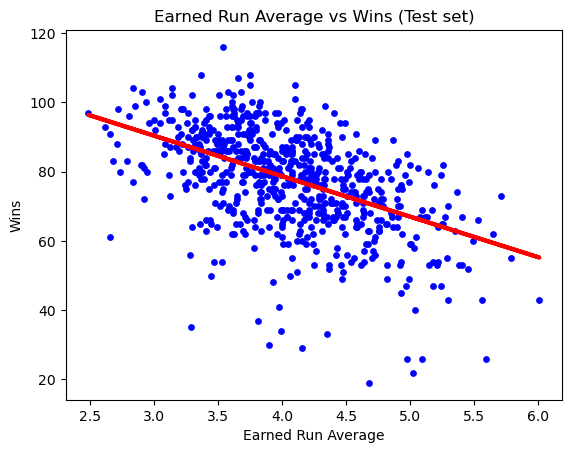

In [18]:
# creating chart to visualize regression lines on test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Earned Run Average vs Wins (Test set)')
plot_test.xlabel('Earned Run Average')
plot_test.ylabel('Wins')
plot_test.show()

# Step 10. 

The line of regression has a questionable fit in this chart. However, we can see a gradual decline in wins as the earned run average increases and the win totals fall a bit furhter from the line as the earned run average swells furhter above the mean. 

Perhaps additional analysis should be conducted to use a win percentage rather than outright wins as seasons prior to 1969 featured only 154 games instead of the full 162 and some seasons have been shortened by players union strikes and other factors such as the 2020 global health crisis. The 2020 season likely makes up a portion of the sub 40 win seasons represented in the chart. 

# Step 11. 

In [21]:
# creating objects for non-visual analysis review
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [22]:
# printing slope, mse, and r2 score
print('Slope:', regression.coef_)
print('Mean Squared Error:', rmse)
print('R2 Score:', r2)

Slope: [[-11.69813565]]
Mean Squared Error: 153.84416441680102
R2 Score: 0.26696753863597245


# Step 12. 

In [23]:
# Y predicted array
y_predicted

array([[86.19587708],
       [79.17699568],
       [86.42983979],
       [74.84868549],
       [81.2826601 ],
       [71.92415158],
       [80.69775332],
       [76.25246177],
       [86.31285843],
       [78.70907026],
       [85.72795165],
       [75.08264821],
       [85.61097029],
       [86.07889572],
       [80.81473468],
       [72.39207701],
       [81.16567875],
       [92.62985168],
       [71.45622616],
       [75.66755499],
       [57.76940744],
       [73.67887193],
       [64.0864007 ],
       [87.13172793],
       [82.21851095],
       [84.32417537],
       [78.70907026],
       [82.68643638],
       [83.73926859],
       [82.1015296 ],
       [69.81848716],
       [87.83361607],
       [83.03738045],
       [84.20719401],
       [72.74302108],
       [65.9581024 ],
       [74.38076007],
       [77.07133127],
       [76.95434991],
       [77.42227534],
       [78.82605162],
       [79.52793975],
       [75.55057363],
       [77.89020076],
       [75.55057363],
       [84

In [25]:
# dataframe to compare actual with predicted resuts
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(50)

,Actual,Predicted
0,87,86.195877
1,62,79.176996
2,90,86.429840
3,76,74.848685
4,87,81.282660
5,64,71.924152
6,74,80.697753
7,69,76.252462
8,88,86.312858
9,87,78.709070


# Step 13. 

The model performed a bit worse than expected, however factors emerged to explain this performance and future analyses can be adjusted to accomodate those factors. Moving forward, rate stats will be a better varible to use as they account for subtle changes in games played over time which directly impact the wins total. 

This model wasn't able to prove the hypothesis directlt, but suggests that earned run average is certainly a contributing factor to wins, it just isnt the only factor. The game has many aspects and the bottom line in generating a win is scoring more runs than your opponent which can function independently of earned run average on any given day. 

Measurement bias appears to be present in this analysis as refrenced before, the total games played has varied in some seasons and the use of rate stats rather than total wins can help reduce/eliminate this bias to allow for a better fitting, more explanatory model in future analyses.